# Media Company Case Study

**Problem Statement** : A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

# 1. Importing Dependencies and Dataset

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
%matplotlib inline
# sns.set_style('whitegrid')

In [2]:
# importing datasets
media = pd.read_csv('mediacompany.csv')
# display top 5 rows of the dataset
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


### Data Dictionary:
- `Date` : The day the show is aired from first day to the present or the last day. The show started on 1st march 2017
- `Views_show` : Number of people viewing the show
- `Visitors` : Number of visitors on the platform, includes even those who visited the platform but did not watch it
- `Views_platform` : Total views on the platform
- `Ad_impression` : Number of people the ads reached, related to marketing spent
- `Cricket_match_india` : If there's a cricket match of Indian team or not. Cricket match, especially of Indian team, greatly affects the viewerships in India
- `Character_A` : Whether a certain (people's favorite) character appears on the show or not

In [3]:
# drop unwanted empty column
media.drop('Unnamed: 7', axis=1, inplace=True)

In [4]:
# print dimensions of media dataset
print('# rows in dataset : ', media.shape[0])
print('# cols in dataset : ', media.shape[1])

# rows in dataset :  80
# cols in dataset :  7


#### Observations :
- Fairly small dataset (80 x 7)

# 2. Exploratory Data Analysis and Feature Engineering

In [5]:
# display top 5 rows of dataset
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [6]:
# display metadata
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [7]:
# display metadata
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


#### Observations :
- There are 0 empty datapoints
- `Date` column needs to be converted to date type

In [8]:
# convertine 'Date' to pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [9]:
# display metadata
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [10]:
# derive the number of days the show is running for
from datetime import date

media['d0'] = date(2017, 2, 28)  # create a new column the day before the show started
media['d0'] = pd.to_datetime(media['d0'])  # convert new column to datetime
media['days'] =  media['Date'] - media['d0']  # calculate the no. of days the show is running in a new column
media.drop(columns=['d0'], inplace=True)  # drop the 'd0' column
media.head()  # display top 5 rows

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [11]:
# cleaning the new 'days' column # removing the terms 'days' in all entries
media['days'] = media['days'].astype(str)  # convert the 'days' coulumn to string format
media['days'] = media['days'].map(lambda x: x[0:2])
media['days'] = media['days'].astype(int)

media.head()  # display top 5 rows

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [12]:
media.tail()  # display bottom 5 rows
# this means that the show ran for 80 days

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80


### Plotting

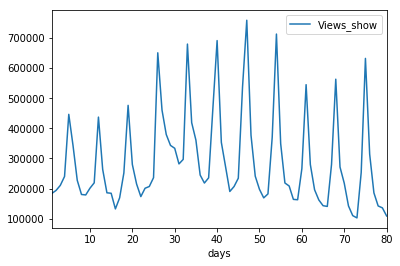

In [13]:
# Line-plot of 'Views_show' vs 'days'
media.plot.line(x = 'days', y = 'Views_show')

#### Observations
- There is massive peak at every weekend
- There is a rise in the viewership where it reaches its peak 7th weekend and then observes a sharp decline

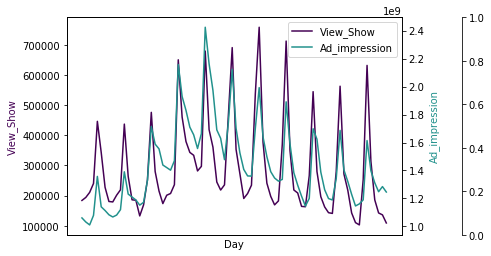

In [14]:
# plot for 'days' vs 'Views_show' and 'days' vs 'Ad_impressions' to compare the effect of 'Ad_impressions'

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.days,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.days,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

#### Observations
- Wherever there's a peak in the views, there is also a complimentary spike in the Ad impressions
- There is a clear relation between the day of the week and the views of the show

In [15]:
# Derived metric
# We'll create a new feature to check the day of the week
# 1 = Sunday to 7 = Saturday

media['weekday'] = (media['days']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


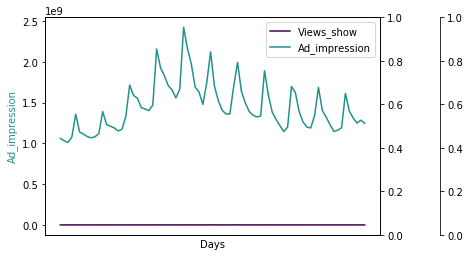

In [16]:
# dual plot
# line plot for Views_shows vs Ad_impression

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Days')
host.set_ylabel('Views_show')
host.set_ylabel('Ad_impression')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)

p1, = host.plot(media['days'], media['Views_show'], color = color1, label = 'Views_show')
p2, = host.plot(media['days'], media['Ad_impression'], color = color2, label = 'Ad_impression')

lns = [p1,p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
# no x-ticks
par2.xaxis.set_ticks([])
# for same axis
# par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
host.yaxis.label.set_color(p2.get_color())

plt.savefig('pyplot_multiple_y-axis.png', bbox_inches='tight')

# Modelling

## We will build models using forward selection method
### Building 1st model - 'Visitors','weekday'

In [17]:
# putting feature variable to X
X = media[['Visitors','weekday']]

# putting response variable to Y
y = media['Views_show']

In [18]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
from statsmodels import api as sm
# unlike sklearn, statsmodel don't automatically fit a constant
# therefore, we need to add a constant
X = sm.add_constant(X)

lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           8.01e-12
Time:                        09:04:44   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We notice that our R-squared and Adj R-squared values are not that great.
This means that the features selected in X are not highly correlated with the y feature

In [20]:
# derived metric - weekend
# 

def weekend(i):
    if (i % 7) == 5:
        return 1
    elif (i % 7) == 4:
        return 1
    else:
        return 0
    return i

media['weekend'] = [weekend(i) for i in media['days']]

In [21]:
media.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0


### Running second model


In [22]:
# With 'Visitors' & 'weekend'
X = media[['Visitors','weekend']]

y = media['Views_show']

In [23]:
X = sm.add_constant(X)
lr_2 = sm.OLS(y,X).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.51e-12
Time:                        09:04:44   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

We can see that there is some improvement in the R-squared and Adj-R-Squared values this time

### Running 3rd model

In [24]:
# With 'Visitors' & 'weekend'
X = media[['Visitors','weekend','Character_A']]

y = media['Views_show']

X = sm.add_constant(X)
lr_3 = sm.OLS(y,X).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        09:04:44   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

Some improvement in R-squared and Adjusted R-squared values

In [25]:
# we will create a lag variable for 'Views_show' to see how the views of previous episodes effect the next episodes
media['Lag_views'] = np.roll(media['Views_show'], 1)
media['Lag_views'].replace(108961,0, inplace = True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### Running 4th model


In [26]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A', 'Lag_views']]
# Putting response variable to y
y = media['Views_show']
# Adding constant to statsmodel
X = sm.add_constant(X)
lr_4 = sm.OLS(y,X).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           3.16e-21
Time:                        09:04:44   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

- Massive improvement in R-sq & Adj-R-sq values.
- p-value for Visitors is very high, maybe we'll have to remove it
- However, when we think about it from the business perspective, we realise that the marketing team has no say in the number of views of the previous day. Therefore, we'll have to remove it.

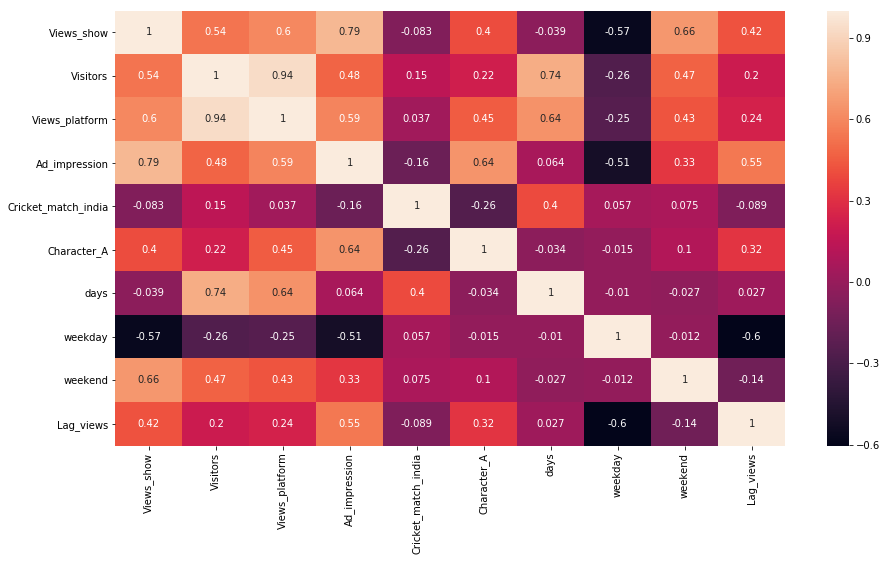

In [27]:
# Draw correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(media.corr(), annot=True)

### Running 5th model

In [28]:
# placing features in X variable
X = media[['weekend','Character_A','Views_platform']]
# placing response variable to y
y = media['Views_show']

# Adding constant to statsmodel
X = sm.add_constant(X)
lr_5 = sm.OLS(y,X).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           3.59e-15
Time:                        09:04:45   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

- Views on platform is fairing a good model for us, but may not be relevant for the marketing team. 
- Visitors will be a better metric for the marketing team to control

### Running 6th model

In [29]:
# placing independent features in X
X = media[['weekend','Character_A','Visitors']]
# placing dependent feature in y
y = media['Views_show']
# adding constant to statsmodel
X = sm.add_constant(X)
lr_6 = sm.OLS(y,X).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.53e-14
Time:                        09:04:45   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

- R-sq and Adj-R-sq values are pretty decent
- p-values are also not bad
- Let's add Ad_impression feature to the model and test

### Running 7th model

In [30]:
# placing independent features in X
X = media[['weekend','Character_A','Visitors','Ad_impression']]
# placing dependent features in y
y = media['Views_show']
# adding constant to statsmodel
X = sm.add_constant(X)
lr_7 = sm.OLS(y,X).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.10e-25
Time:                        09:04:45   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

- Very high R-sq and Adj-R-sq values
- Character_A has a negative coeeficient in this model, whereas it was positive earlier
- Visitors has got a very high p-value, i.e. it has become insignificant, it could be due to multicollinearity

### Running 8th model

In [31]:
# placing independent features in X
X = media[['weekend','Character_A','Ad_impression']]
# placing dependent features in y
y = media['Views_show']
# adding constant to statsmodel
X = sm.add_constant(X)
lr_8 = sm.OLS(y,X).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        09:04:45   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

- While all values seem to be great
- The coefficient of Ad_impression is very low when compared to the other features
- This is becuase the Ad_impression in the data was given in millions, therefore, let us divide that feature by 1 million to get a better perspectve
- Let us also include Cricket match in X as we haven't considered that yet

In [32]:
# scaling Ad_impression
media['Ad_impression_mill'] = media['Ad_impression']/1000000

### Running 9th model

In [33]:
# placing independent features in X
X = media[['weekend','Character_A','Ad_impression_mill','Cricket_match_india']]
# placing dependent features in y
y = media['Views_show']
# adding constant to statsmodel
X = sm.add_constant(X)
lr_9 = sm.OLS(y,X).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.02e-25
Time:                        09:04:45   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    

- Great R-sq & Adj-R-sq values
- p-value is very high for cricket match, insignificant for this model
- Ad impression coeff has improved
- 'Cricket match india' is not making a great impact, so we can get rid of it

### Running the 10th model

In [36]:
# placing independent features in X
X = media[['weekend','Character_A','Ad_impression_mill']]
# placing dependent features in y
y = media['Views_show']
# adding constant to statsmodel
X = sm.add_constant(X)
lr_10 = sm.OLS(y,X).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           1.05e-26
Time:                        22:00:18   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.661e+05   4.74

- Character A is also not looking very significant for us, we may remove it
- weekend is also a very significant variable, but, the marketing team cannot control the weekend either.
- Marketing team can control Ad impression, which has a high positive coefficient
- This model tells us that utilising the marketing budget for Ads will be a fruitful activity to get higher TRPs

# Verifying the model
### Verifying model 10

In [41]:
# making predictions using model 10
X = media[['weekend','Character_A','Ad_impression_mill']]
X = sm.add_constant(X)
Predicted_views = lr_10.predict(X)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media['Views_show'], Predicted_views)
r_squared = r2_score(media['Views_show'], Predicted_views)

print('Mean Squared Error : ', mse)  # print the Mean Squared Error Value of the model 10
print('r_squared Value    : ', r_squared)  # print the R-Squared value of the model 10

Text(0,0.5,'Views')

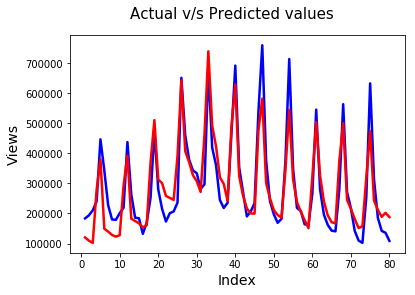

In [54]:
# Plot a line plot to compare actual vs predicted values
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, media['Views_show'], color = 'blue', linewidth = 2.5)
plt.plot(c, Predicted_views, color = 'red', linewidth = 2.5)
fig.suptitle('Actual v/s Predicted values', fontsize = 15)
plt.xlabel('Index', fontsize = 14)
plt.ylabel('Views', fontsize = 14)

Observations
- We can observe that our model 10 is predicting the values with great accuracy

Text(0,0.5,'Error = View_shows - Predicted Values')

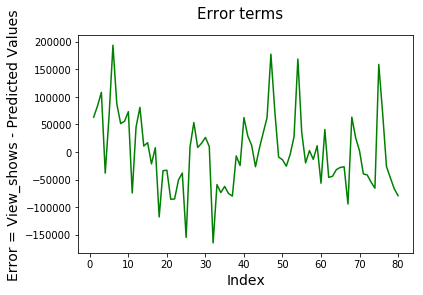

In [64]:
# error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, media['Views_show'] - Predicted_views,color='green')
fig.suptitle('Error terms',  fontsize=15)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Error = View_shows - Predicted Values', fontsize=14)

### Verifying model 6
In model 6, the feature Character A had a positive coefficient. Let's test its performance against model 10

In [65]:
# making predictions using model 6
X = media[['weekend','Character_A','Ad_impression_mill']]
X = sm.add_constant(X)
Predicted_views = lr_6.predict(X)

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media['Views_show'], Predicted_views)
r_squared = r2_score(media['Views_show'], Predicted_views)

print('Mean Squared Error : ', mse)  # print the Mean Squared Error Value of the model 10
print('r_squared Value    : ', r_squared)  # print the R-Squared value of the model 10

Mean Squared Error :  74113970295.19772
r_squared Value    :  -2.1269703084208156


Text(0,0.5,'Views')

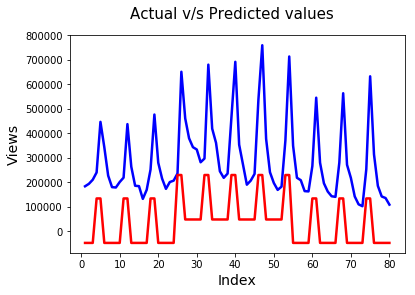

In [67]:
# Plot a line plot to compare actual vs predicted values
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c, media['Views_show'], color = 'blue', linewidth = 2.5)
plt.plot(c, Predicted_views, color = 'red', linewidth = 2.5)
fig.suptitle('Actual v/s Predicted values', fontsize = 15)
plt.xlabel('Index', fontsize = 14)
plt.ylabel('Views', fontsize = 14)

Text(0,0.5,'Views_show-Predicted_views')

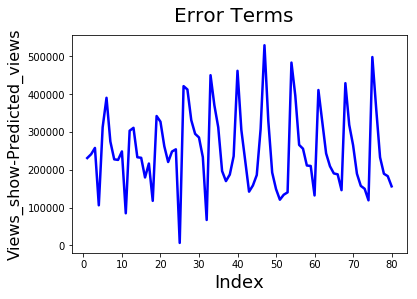

In [68]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

- We say that the difference is huge in the predicted values and the actual values
- Therefore, the **performance is better in model 10**

----

### Recommendations to Marketing Team
- While we observed that there are multiple features that were effecting the viewership but not all those features are controllable by the marketing team (like views, character_A and Lag_views)
- The most impactful and controllable feature that can be manipulated for better views are 'Ad_impression'. Timely ads by the marketing team will help gain back the viewership.

- - - - 